In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [33]:
Data =pd.read_csv('Balin_peq-1.csv', index_col=False, header=0, sep='\s+', decimal=',',
                  skiprows=1, usecols=[0,1,2])
Data.columns = ['time', 'x', 'vx']
#Data = Data.dropna()
Data.describe()

/home/jaime/miniconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,time,x,vx
count,439.000000,439.000000,410.000000
mean,7.737715,4.738519,36.549912
std,4.571296,179.091848,8.945681
min,0.000000,-276.700000,-11.310000
25%,3.854000,-145.900000,NaN
50%,7.674000,-2.835000,NaN
75%,11.628500,153.450000,NaN
max,15.749000,324.400000,53.550000


(0, 45.0)

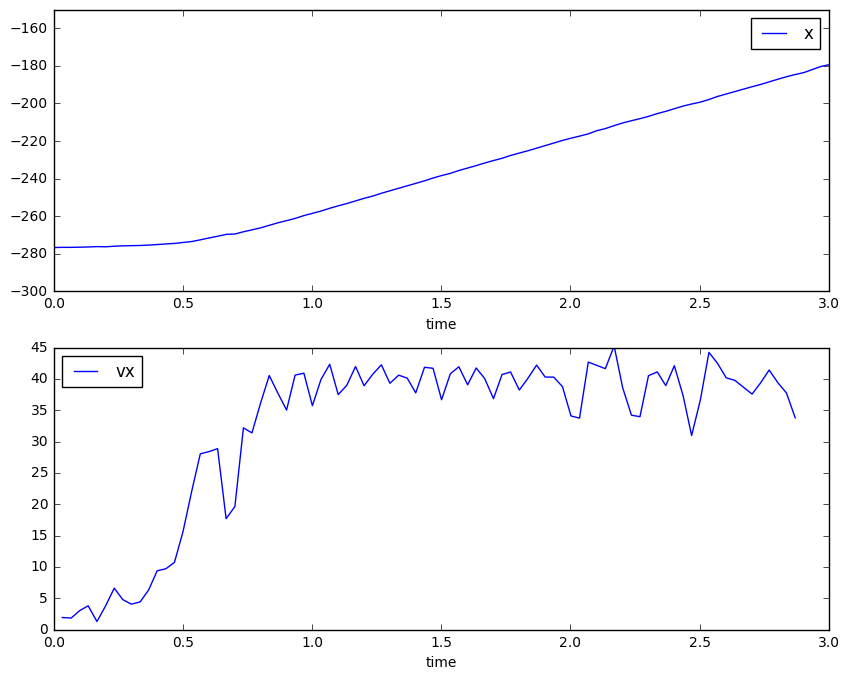

In [35]:
fig, axs = plt.subplots(2,1)
Data.plot( x='time', y='x', ax=axs[0], figsize=(10, 8))
axs[0].set_xlim(0.0, 3.0)
axs[0].set_ylim(-300, -150)
Data.plot( x='time', y='vx', ax=axs[1],figsize=(10, 8))
axs[1].set_xlim(0.0, 3.0)
axs[1].set_ylim(0, 45.0)

In [79]:
xdata = Data.iloc[:,0].values
ydata = Data.iloc[:,1].values

In [94]:
idx = np.isfinite(xdata) & np.isfinite(ydata)
x_clean = xdata[idx]
y_clean= ydata[idx]

In [95]:
def func(x, a, b, c,d):
    return a * np.exp(-b * x) + c + d*x

In [96]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, x_clean, y_clean)

/home/jaime/miniconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [97]:
popt


array([   21.76332349,  3088.00861767,  -298.46332349,    39.17852464])

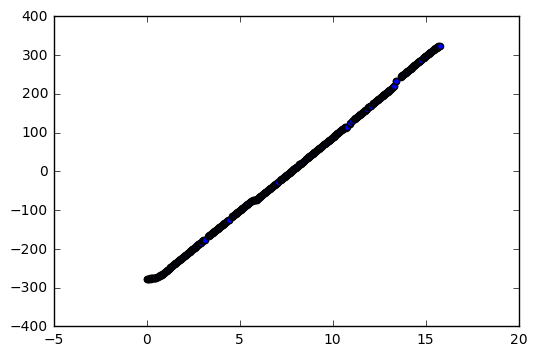

In [85]:
plt.scatter(x_clean,y_clean)

In [90]:
def fit_func(x):
    return func(x, popt[0], popt[1],popt[2] , popt[3])

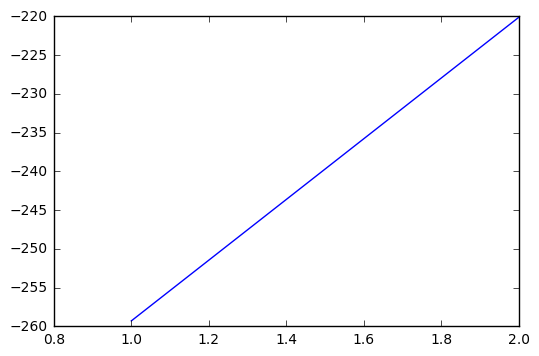

In [93]:
xx =  np.linspace(1., 2., 100)
yy = fit_func(xx)
plt.plot(xx,yy)